# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Fixing random state for reproducibility
np.random.seed(2360873)

In [2]:
#dataframe de previsao de renda
prev_renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
prev_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
#identificando tipos
prev_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [4]:
#filtrando numericos(quantitativos) e retirando indesejados(unnamed e index)
prev_renda = prev_renda.select_dtypes(include=['number'])
prev_renda = prev_renda.drop('Unnamed: 0', axis=1)
prev_renda = prev_renda.drop('index', axis=1)
prev_renda

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


In [5]:
#correlacao
prev_renda.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


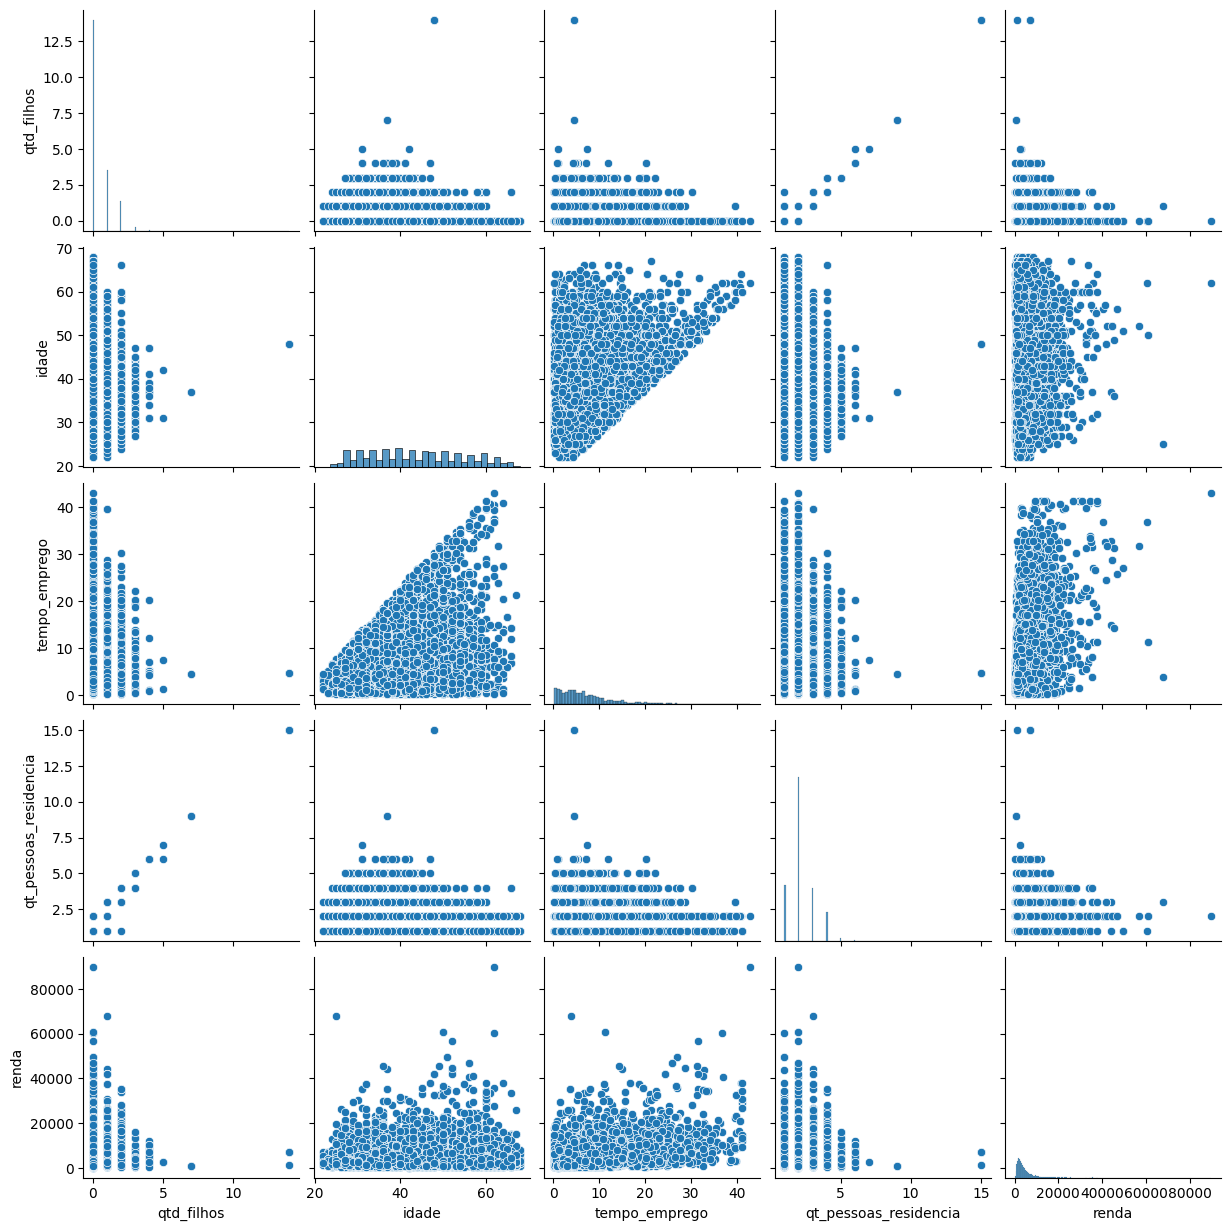

In [7]:
#graficos
sns.pairplot(prev_renda)

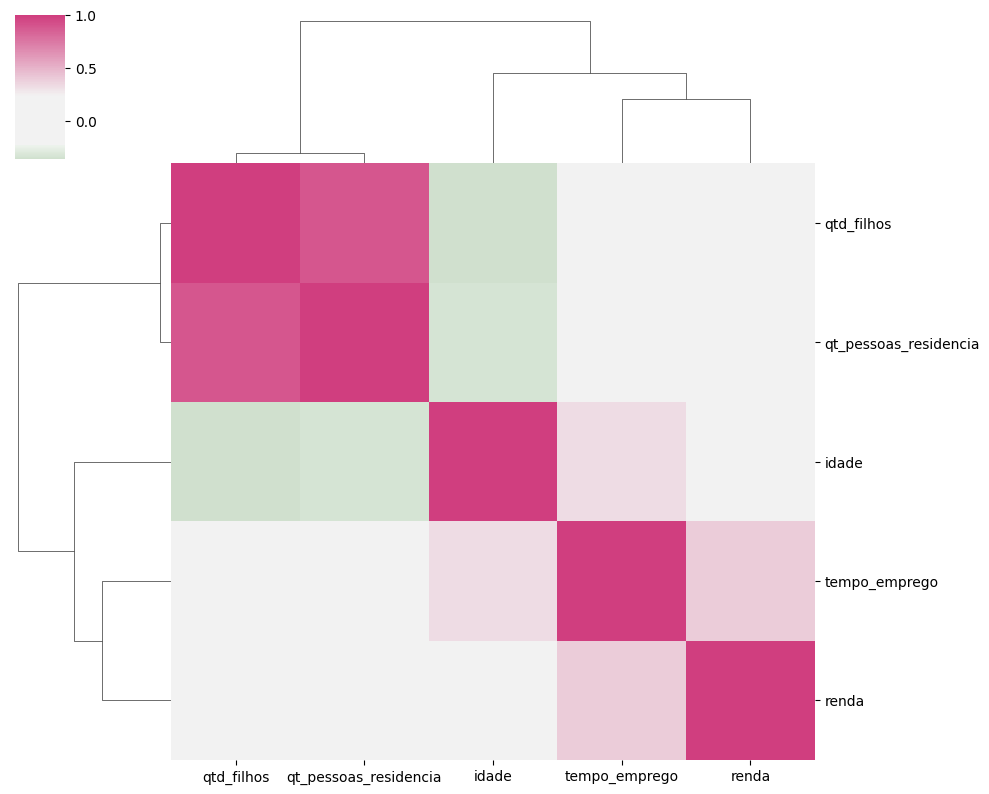

In [10]:
#criando uma matriz de correlação
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(prev_renda.corr(), figsize=(10, 8), center = 0, cmap=cmap)

Foram gerados os insights:
- A Quantidade de Filhos possui correlação positiva com Quantidade de Pessoas por Residencia.
- A Idade possui correlação negativa com Quantidade de Filhos e Quantidade de Pessoas por Residencia.
- A Idade possui correlação positiva com Tempo de Emprego.
- O Tempo de Emprego possui correlação muito baixa com Renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

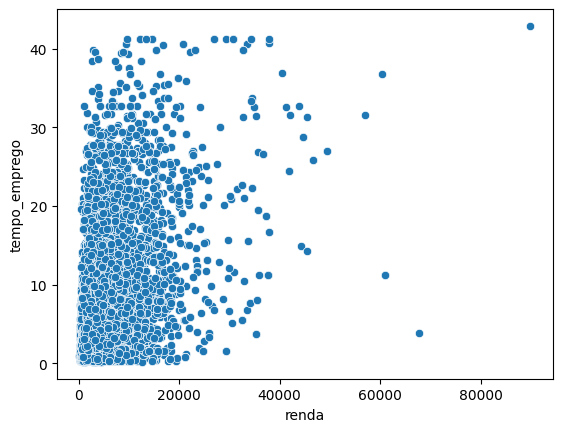

In [17]:
a = sns.scatterplot(x='renda', y='tempo_emprego', data = prev_renda)

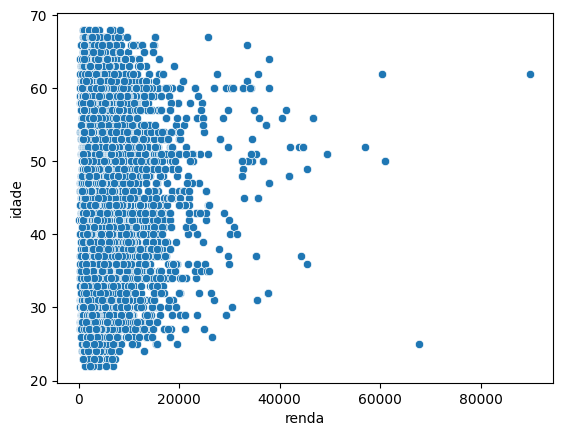

In [18]:
b = sns.scatterplot(x='renda', y='idade', data = prev_renda)

3) Na sua opinião, há outliers na variável renda?

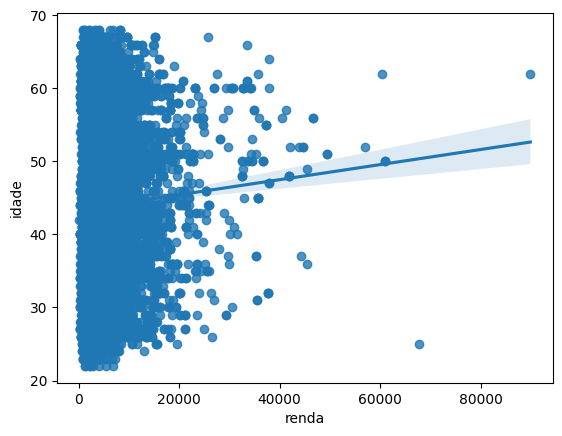

In [19]:
_ = sns.regplot(x='renda', y='idade', data = prev_renda)

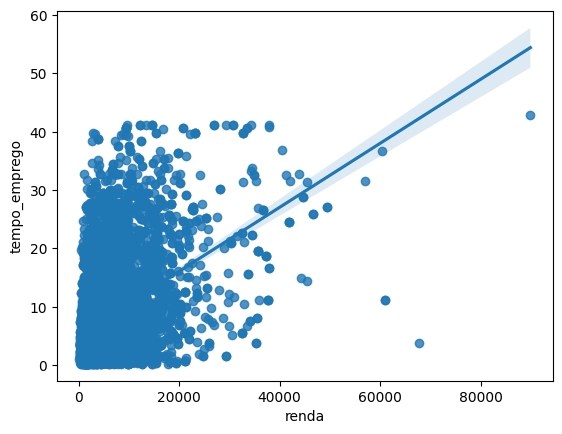

In [20]:
_ = sns.regplot(x='renda', y='tempo_emprego', data = prev_renda)

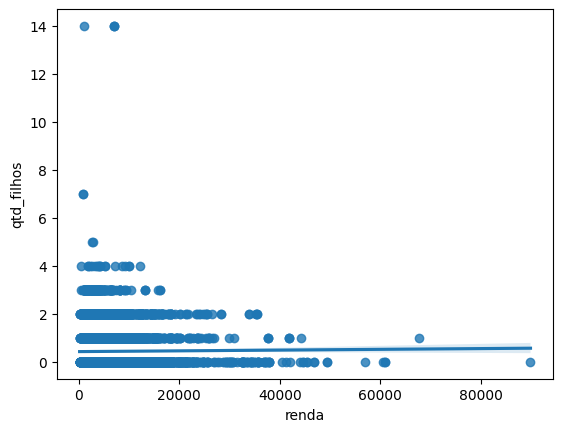

In [21]:
_ = sns.regplot(x='renda', y='qtd_filhos', data = prev_renda)

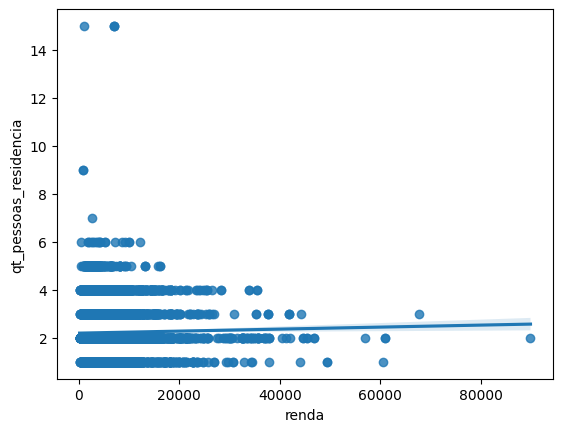

In [22]:
_ = sns.regplot(x='renda', y='qt_pessoas_residencia', data = prev_renda)

- Sim, existem outliers na variavel Renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

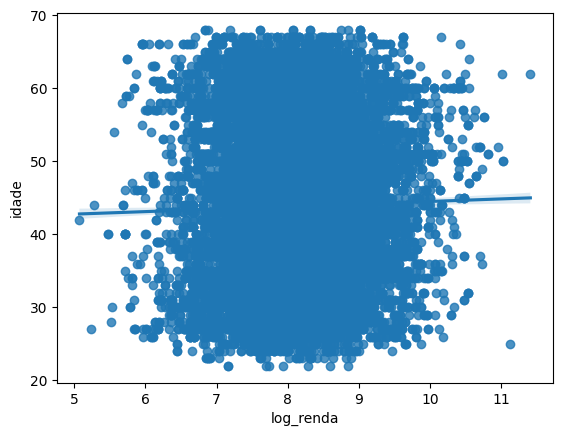

In [43]:
#calculo de log da renda
prev_renda_log = prev_renda.copy()
prev_renda_log['log_renda'] = np.log(prev_renda_log['renda'])

_ = sns.regplot(x='log_renda', y='idade', data = prev_renda_log)

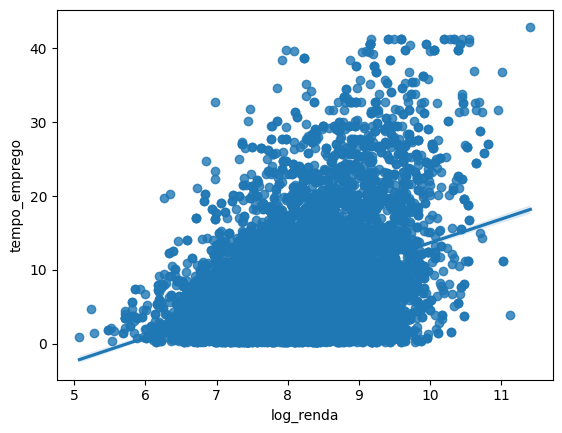

In [44]:
_ = sns.regplot(x='log_renda', y='tempo_emprego', data = prev_renda_log)

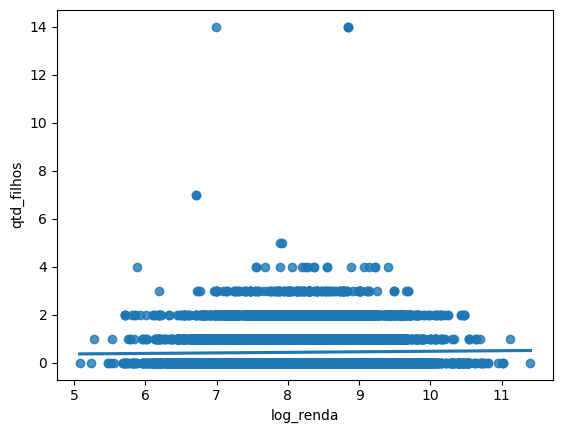

In [45]:
_ = sns.regplot(x='log_renda', y='qtd_filhos', data = prev_renda_log)

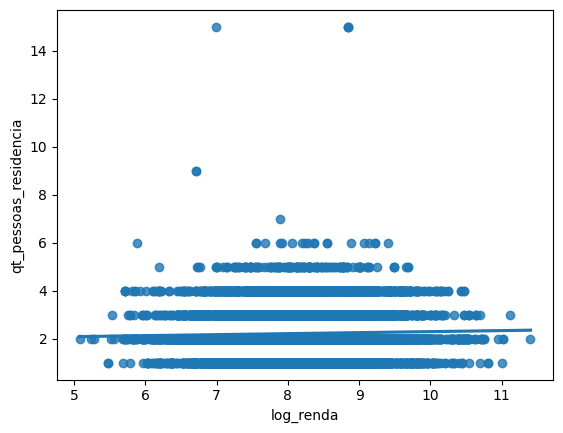

In [46]:
_ = sns.regplot(x='log_renda', y='qt_pessoas_residencia', data = prev_renda_log)

In [47]:
prev_renda_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

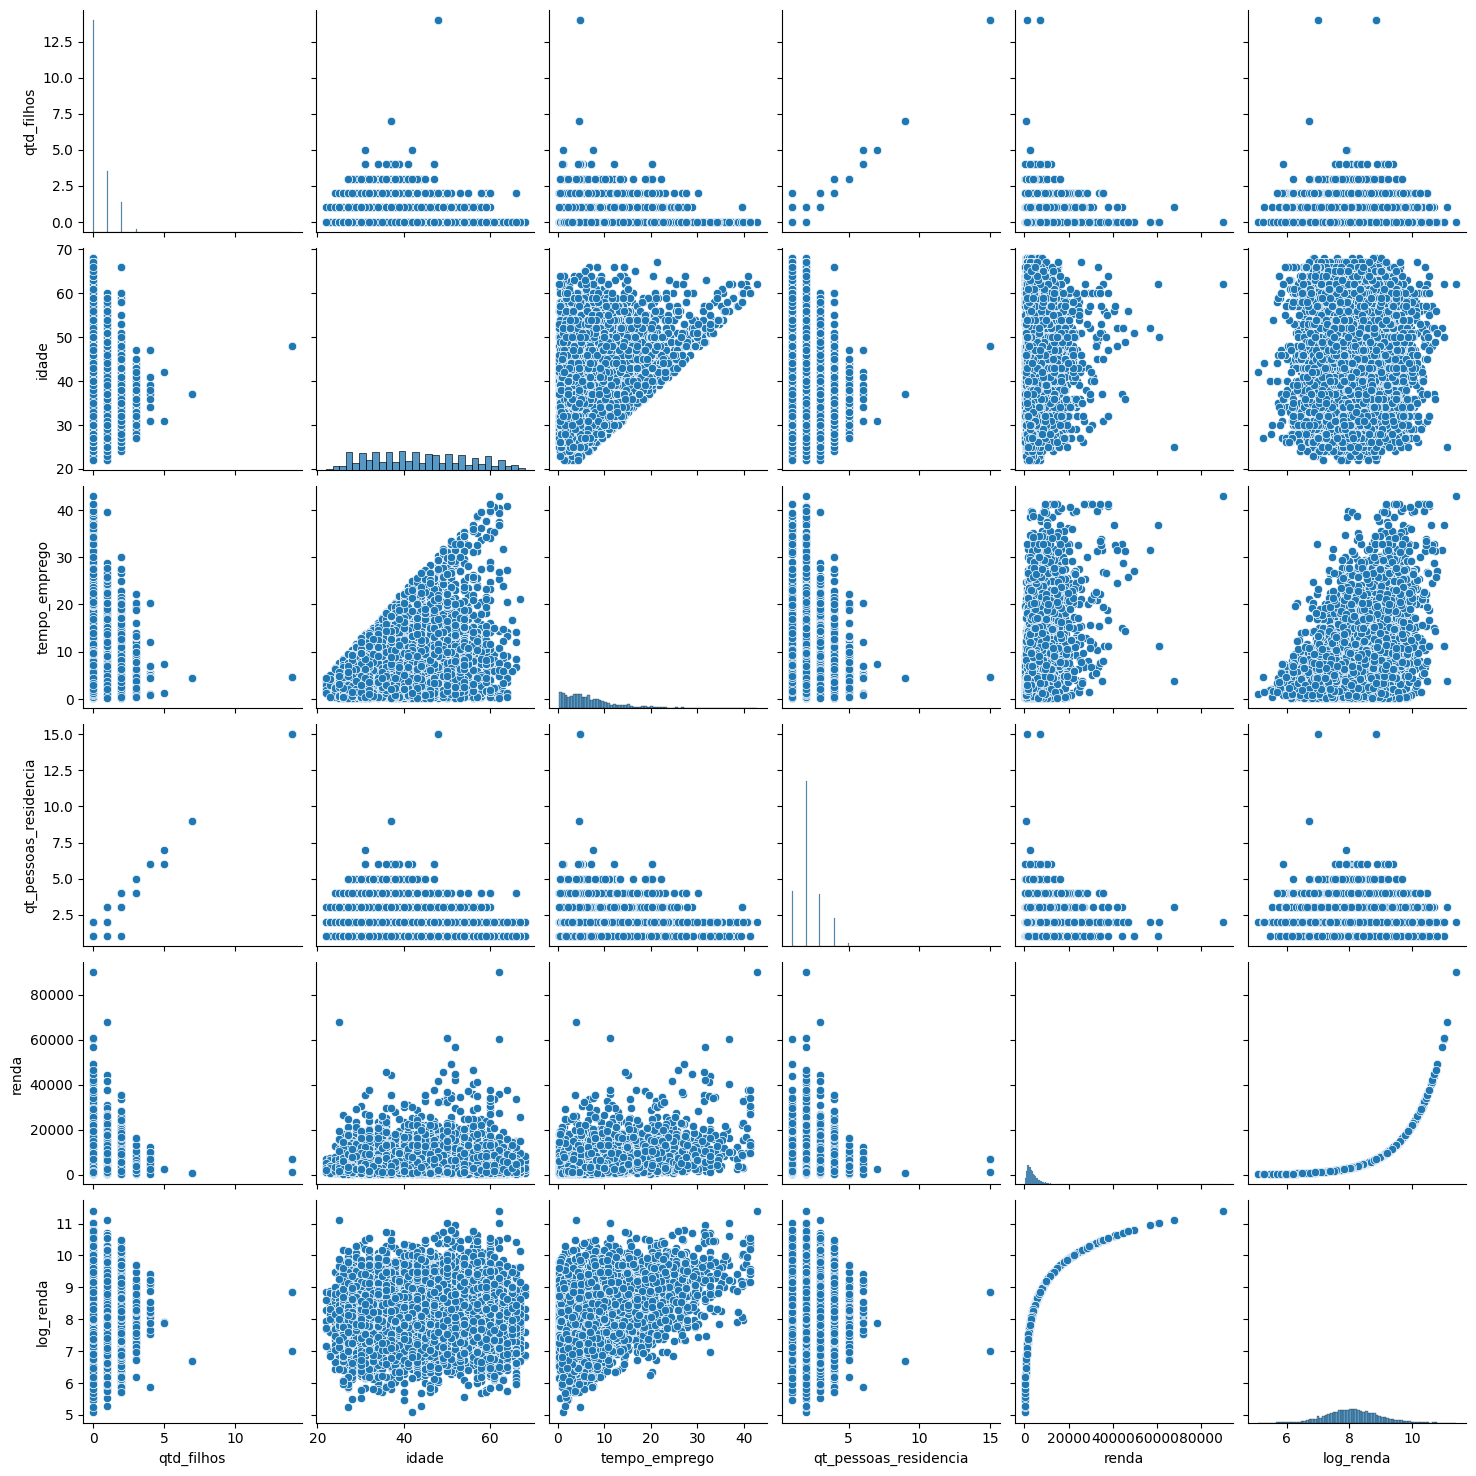

In [48]:
#graficos
sns.pairplot(prev_renda_log)

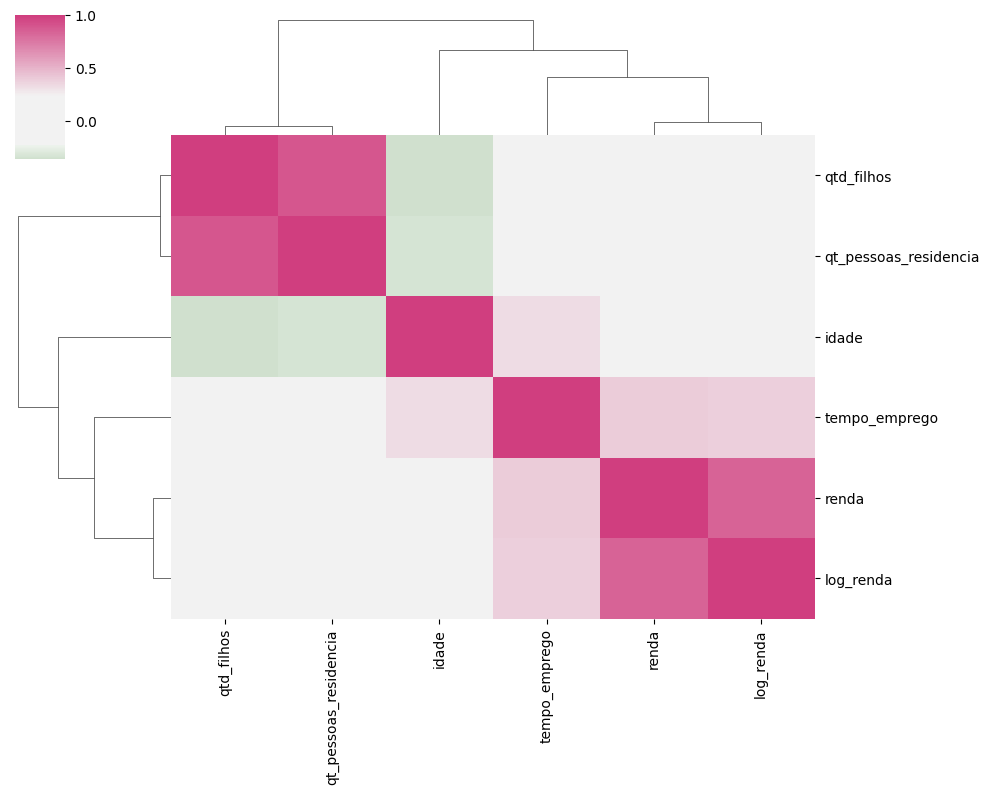

In [49]:
#criando uma matriz de correlação
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(prev_renda_log.corr(), figsize=(10, 8), center = 0, cmap=cmap)

- De acordo com os graficos e scatterplot, o log_renda melhorou o grafico. No geral não houve grandes mudanças na correlação, porém diminuiu-se a quantidade de outliers.